### Anexo F

# Segmentador 2

#### Elaborado por: Ricardo Niño de Rivera Barrón

#### Ingeniería Biónica

#### Trabajo Terminal II

En esta libreta se muestra el proceso mediante el cual se realiza la segmentación final propuesta para Trabajo Terminal II.



Primero importamos las librerías necesarias.

In [1]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib as mpl

In [2]:
#Biblioteca de la propuesta final para la segmentación
import segmentador2

In [3]:
#Leyendo los archivos en los directorios de interés.
files=os.listdir("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL_256_bits\\train")
files2=os.listdir("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL_256_bits\\test")

Creamos los directorios para guardar los archivos de interés.

In [4]:
#Creando directorio
os.mkdir('BaseDeDatosFrontales_SEGMENTADOR2')

#Subcarpeta para los archivos de entrenamiento
os.mkdir('BaseDeDatosFrontales_SEGMENTADOR2\\train')

#Subcarpeta para los archivos npy}
os.mkdir('BaseDeDatosFrontales_SEGMENTADOR2\\train\\files_npy')

#Subcarpeta para las imágenes para examinación manual
os.mkdir('BaseDeDatosFrontales_SEGMENTADOR2\\train\\images')

#Subcarpeta para los archivos de validación
os.mkdir('BaseDeDatosFrontales_SEGMENTADOR2\\test')

#Subcarpeta para los archivos npy
os.mkdir('BaseDeDatosFrontales_SEGMENTADOR2\\test\\files_npy')

#Subcarpeta para las imágenes para examinación manual
os.mkdir('BaseDeDatosFrontales_SEGMENTADOR2\\test\\images')


Vamos a realizar una muestra con un ejemplo aleatorio para describir lo que el segmentador realiza.

In [5]:
#Primero leemos una imagen cualesquiera
imagen_prueba=np.load("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL_256_bits\\train\\"+files[250])

Ahora desplegamos los resultados de nuestro segmentador

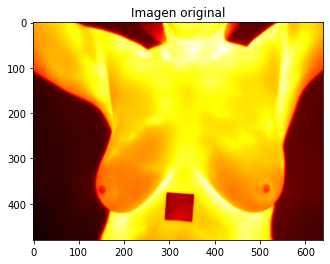

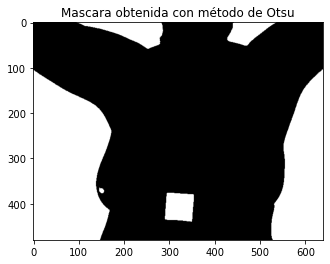

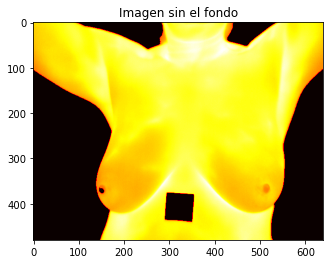

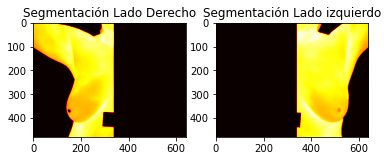

(array([[135., 135., 135., ...,   0.,   0.,   0.],
        [138., 138., 137., ...,   0.,   0.,   0.],
        [139., 137., 137., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([[  0.,   0.,   0., ..., 137., 138., 137.],
        [  0.,   0.,   0., ..., 140., 140., 139.],
        [  0.,   0.,   0., ..., 140., 140., 137.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]))

In [6]:
objeto_prueba=segmentador2.segmentador(imagen_prueba, display_images=True)
objeto_prueba.prueba()

### Imágenes de entrenamiento

In [7]:
#Instanciamos un objeto para guardar nuestras imágenes como mapa de calor
cm_hot = mpl.cm.get_cmap('hot')

In [8]:
#En esta variable almacernaremos la cantidad de errores de implemenatción
errores=0
counter=0

for i in tqdm(files):
    
    try:
        
        imagen_temp=np.load("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL_256_bits\\train\\"+i)
        objeto_temp=segmentador2.segmentador(imagen_temp)
        right_breast, left_breast=objeto_temp.prueba()
        
        #Guardando archivos npy
        #Seno derecho
        np.save("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_SEGMENTADOR2\\train\\files_npy\\"+i[:-4]+"_D"+".npy",right_breast)
        #Seno izquierdo
        np.save("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_SEGMENTADOR2\\train\\files_npy\\"+i[:-4]+"_I"+".npy",left_breast)
        
        #Guardando imágenes
        #Seno derecho
        im_r=right_breast.astype(int)
        im_r = cm_hot(im_r)
        im_r = np.uint8(im_r * 255)
        im_right = Image.fromarray(im_r)
        im_right.save("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_SEGMENTADOR2\\train\\images\\"+i[:-4]+"_D"+".png")
        #Seno izquierdo
        im_l=left_breast.astype(int)
        im_l = cm_hot(im_l)
        im_l = np.uint8(im_l * 255)
        im_left = Image.fromarray(im_l)
        im_left.save("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_SEGMENTADOR2\\train\\images\\"+i[:-4]+"_I"+".png")
        
        counter+=1
    
    except:
        
        counter+=1
        errores+=1
        pass

100%|██████████████████████████████████████| 3337/3337 [40:37<00:00,  1.37it/s]


In [10]:
print("Errores en la segmentación de imágenes del conjunto de Entrenamiento: %d"%errores)

Errores en la segmentación de imágenes del conjunto de Entrenamiento: 0


Un análisis visual de los resultados obtenidos confirma que la segmentación propuesta fue exitosa en todos los casos.

### Imágenes de validación

In [11]:
#En esta variable almacernaremos la cantidad de errores de implemenatción
errores=0
counter=0

for i in tqdm(files2):
    
    try:
        
        imagen_temp=np.load("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL_256_bits\\test\\"+i)
        objeto_temp=segmentador2.segmentador(imagen_temp)
        right_breast, left_breast=objeto_temp.prueba()
        
        #Guardando archivos npy
        #Seno derecho
        np.save("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_SEGMENTADOR2\\test\\files_npy\\"+i[:-4]+"_D"+".npy",right_breast)
        #Seno izquierdo
        np.save("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_SEGMENTADOR2\\test\\files_npy\\"+i[:-4]+"_I"+".npy",left_breast)
        
        #Guardando imágenes
        #Seno derecho
        im_r=right_breast.astype(int)
        im_r = cm_hot(im_r)
        im_r = np.uint8(im_r * 255)
        im_right = Image.fromarray(im_r)
        im_right.save("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_SEGMENTADOR2\\test\\images\\"+i[:-4]+"_D"+".png")
        #Seno izquierdo
        im_l=left_breast.astype(int)
        im_l = cm_hot(im_l)
        im_l = np.uint8(im_l * 255)
        im_left = Image.fromarray(im_l)
        im_left.save("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_SEGMENTADOR2\\test\\images\\"+i[:-4]+"_I"+".png")
        
        counter+=1
    
    except:
        
        counter+=1
        errores+=1
        pass

100%|████████████████████████████████████████| 832/832 [07:26<00:00,  1.86it/s]


In [12]:
print("Errores en la segmentación de imágenes del conjunto de Validación: %d"%errores)

Errores en la segmentación de imágenes del conjunto de Validación: 0


Un análisis visual de los resultados obtenidos confirma que la segmentación propuesta fue exitosa en todos los casos.